# Plotting

Plotting data is a very important tool in most areas of scientific and mathematical computing. Julia provides a number of packages and options for this, and here we will focus on the popular `PyPlot` package. It is designed to mimic many of MATLAB's plotting functions.

## Including the PyPlot package

First of all, when you use a so-called *package* in Julia, you need to tell it e.g. with the `using` command:

In [1]:
using PyPlot

## Basic plotting

The basic plotting function is `plot(x,y)`, which draws straight lines between the x,y-coordinates in the vectors `x` and `y`.

The example below illustrates some basic usage by drawing two geometric objects. Some more comments about this code:

- Since these x,y-coordinates represent a 2D plane, it is natural to have them equally scaled (so that e.g. the square will look like a square and not a rectangle). This is done using the command `axis("equal")`.
- The `grid(true)` command includes grid-lines in the plot.
- `xlabel`, `ylabel`, and `title` include strings of text in the plot, enclosed by `""`.

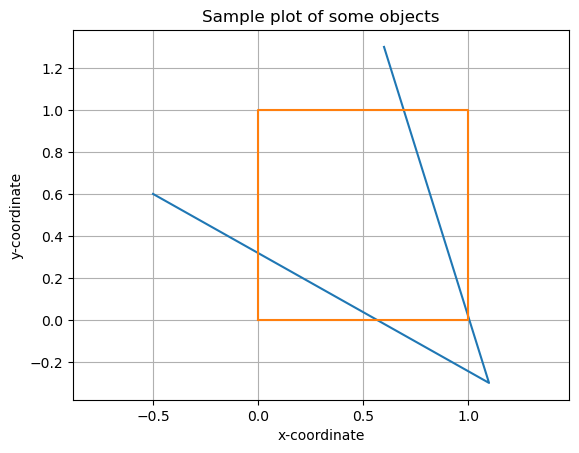

In [2]:
x_lines = [-.5, 1.1, 0.6]
y_lines = [.6, -.3, 1.3]
plot(x_lines, y_lines)

x_square = [0,1,1,0,0]
y_square = [0,0,1,1,0]
plot(x_square, y_square)

axis("equal")
grid(true)
xlabel("x-coordinate")
ylabel("y-coordinate")
title("Sample plot of some objects");

As of late 2021 (and Julia 1.7), there is a slight issue on the backend of `PyPlot` which causes it to produce the warning you see above. This is not an actual issue, and you can safely ignore this warning in case it appears on your version as well.

## Plotting functions

We can use arrays to evaluate and plot functions of the form $y=f(x)$. While there are good packages to do this automatically, the most common approach is to manually create an array of $x$-values, evaluate the corresponding $y$-values, and plot by drawing straight lines between the points. Clearly this method has potential issues (e.g. it is unclear how many points are needed, and discontinuous functions will not be drawn correctly).

As an example, consider the function $f(x) = \sin (5\pi x) + 0.2\sin (25\pi x) - 0.3x$. On the interval $x\in [0,10]$, the code below shows how to plot $f(x)$, $f(x-3)$, and $-0.7f(x^2)$. It also illustrates several new features:

- The parameters `linewidth`, `linestyle`, and `color` can be used to control the appearance of the lines
- The `legend` function creates a box with indentifying text for each line

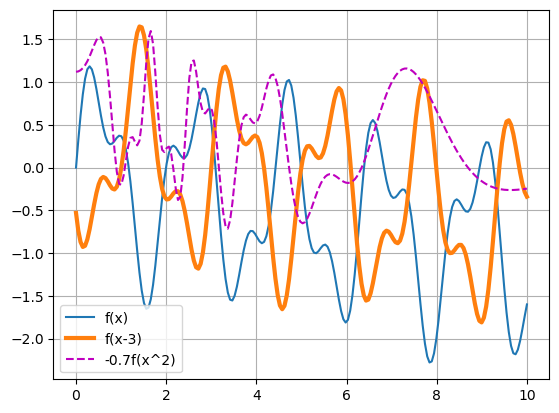

In [3]:
f(x) = sin(3x) + 0.5sin(7x) - 0.1x
x = range(0, stop=10, length=200)      # Create x-vector, 200 points should make a good plot

plot(x, f.(x))
plot(x, f.(x .- 3), linewidth=3)
plot(x, (@. -0.7f(100/(10 + x^2))), color="m", linestyle="--")
legend(("f(x)", "f(x-3)", "-0.7f(x^2)"))
grid(true);

## Plotting parametric curves

The technique from above can easily be extended for plotting parametric curves. For example, consider

$$
\left\{
\begin{array}{l}
x = r\cos(10\pi s) \\
y = r\sin(10\pi s)
\end{array}
\right.
$$

with $r = 0.1+s+0.1\sin(50\pi s)$, for $s\in [0,1]$.

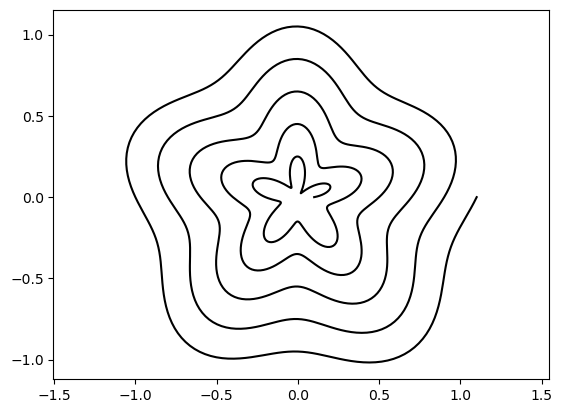

In [4]:
s = 0:0.001:1
r = @. .1 + s + 0.1sin(50π*s)
x = @. r*cos(10π*s)
y = @. r*sin(10π*s)
plot(x, y, "k")
axis("equal");